Train MSE: 4.107
Test MSE: 2.476
Lasso Coefficients: [ 0.43662587 -1.08792294 -0.          0.          2.03522964  0.
  0.          3.48879945  0.          0.        ]


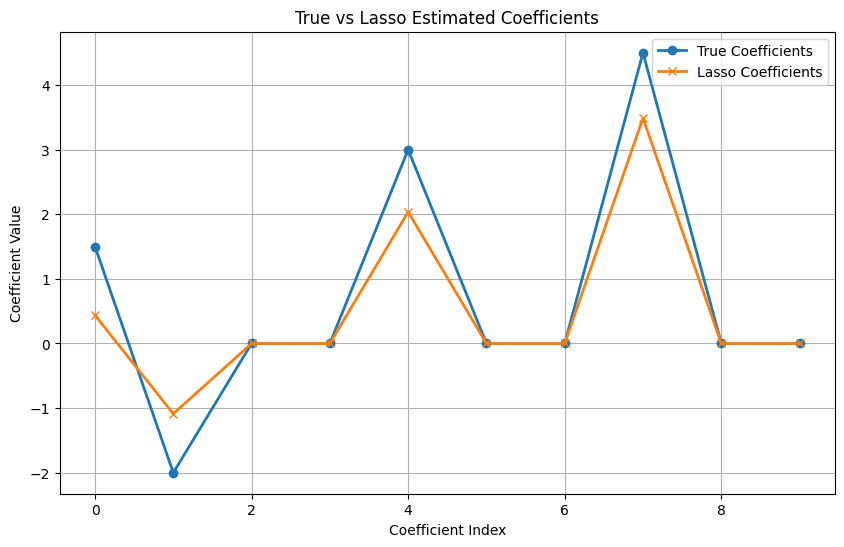

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate some data
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)

# Create true coefficients, some of which are 0
true_coef = np.array([1.5, -2, 0, 0, 3, 0, 0, 4.5, 0, 0])

# Generate targets with some noise
y = X.dot(true_coef) + np.random.normal(0, 0.5, size=n_samples)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso (L1) regularization
lasso = Lasso(alpha=1.0)  # Alpha is the regularization parameter
lasso.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print(f"Train MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")
print("Lasso Coefficients:", lasso.coef_)

# Visualizing the impact of L1 regularization on the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(true_coef)), true_coef, 'o-', label='True Coefficients', linewidth=2)
plt.plot(range(len(lasso.coef_)), lasso.coef_, 'x-', label='Lasso Coefficients', linewidth=2)
plt.title('True vs Lasso Estimated Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()
